In [1]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import logging
LOG_FORMAT = "%(asctime)s [%(levelname)s] %(message)s"
DATE_FORMAT = "%Y-%m-%d %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=LOG_FORMAT, datefmt=DATE_FORMAT)


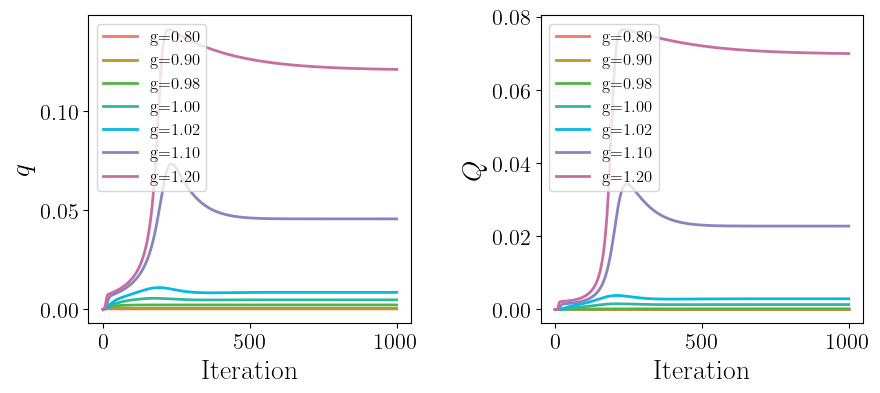

In [8]:
logging.getLogger().setLevel(logging.INFO)
prefixPath = "../../Data/results/8/a2/"
beta = 10000.0
gList = [0.8, 0.9, 0.98, 1.0, 1.02, 1.1, 1.2]
colorLists = ["#F27970", "#BB9727", "#54B345", "#32B897", "#05B9E2", "#8983BF", "#C76DA2"]
eta = 0.0
gamma = 0.0
nonLinearity = 'tanh'

labels = ["$q$", "$Q$"]
fig, ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={
    "wspace": 0.4
})
for i in range(2):
    for j, g in enumerate(gList):
        record = torch.load(prefixPath + f"/path-beta{beta}-gamma{gamma}-g{g}-eta{eta:.1f}-{nonLinearity}.pt")
        minusBetaFList = record["minusBetaF"]
        energyList = record["energy"]
        L2NormList = record["L2Norm"]
        QList = record["Qs"]
        entropyList = minusBetaFList + beta * energyList

        ax[i].plot(torch.arange(len(QList[i])), QList[i], c=colorLists[j], linewidth=2, label="g={:.2f}".format(g))

    ax[i].set_xlabel("Iteration", fontsize=20)
    ax[i].set_ylabel(labels[i], fontsize=20)
    ax[i].tick_params(axis='both', labelsize=16)
    ax[i].legend(loc="upper left", fontsize=12)

# plt.savefig("../../Data/figures/fig-iteration.pdf", bbox_inches="tight")
plt.show()
plt.close()